In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.animation import FuncAnimation

In [20]:
class GradientFind():
    def __init__(self, f, grad_f=None, treshold=0.1, learning_rate = 0.1, animation_interval_ms=1000) -> None:
        if type(f) == 'function':
            self.function = f
        else:
            x = sp.symbols('x')
            formula = sp.sympify(f)
            self.function = sp.lambdify([x], formula)
        if grad_f == None:
            assert type(f) is str, "Variable is not of type string!"
            self.grad_f = self.find_grad(f=f)
        else:
            self.grad_f = grad_f
        self.treshold = treshold
        self.learning_rate = learning_rate
        self.animation_interval_ms = animation_interval_ms

    def find_grad(self, f):
        # Define the variable
        x = sp.symbols('x')

        # Define the function
        formula = sp.sympify(f)

        # Compute the derivative (gradient) of the function
        gradient = sp.diff(formula, x)

        print(f"Function: {f}")
        print(f"Gradient: {gradient}")
        numgradfun=sp.lambdify([x],gradient)
        return numgradfun

    def find(self):
       # Параметры градиентного спуска
        x0 = 5 # Начальное значение

        # Список для хранения значений x на каждой итерации
        x_values = [x0]
        x = x_values[-1]

        i = 0

        x = x_values[-1] - self.learning_rate * self.grad_f(x)
        x_values.append(x)
        # Цикл градиентного спуска
        while abs(self.function(x_values[i]) - self.function(x_values[i-1])) > self.treshold:
            x = x_values[-1] - self.learning_rate * self.grad_f(x)
            x_values.append(x)
            i += 1

        print(f'Кол-во шагов = {i}')
        print(f'min -> x = {round(x_values[-1], 5)}')
        self.x_values = x_values

    def plot_simple(self):

        # Визуализация
        x_range = np.linspace(-5, 5)
        y_values = self.function(x_range)
        plt.figure(figsize=(10, 8))
        plt.plot(x_range, y_values, label='f(x)')
        plt.scatter(self.x_values, self.function(np.array(self.x_values)), c='red', label='Градиентный спуск')

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Градиентный спуск')
        plt.legend()
        plt.grid(True)
        
        plt.show()

    def plot_animation(self):
        x = np.linspace(-2, 6, 100)
        y = self.function(x)

        fig, ax = plt.subplots()
        ax.plot(x, y, label='Function')
        ax.set_xlim(-2, 6)
        ax.set_ylim(min(y) - 1, max(y) + 1)
        ax.set_title('Градиентный спуск (Визуализация)')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.legend()

        points, = ax.plot([], [], 'ro')  # Points of descent
        arrows = []

        def init():
            points.set_data([], [])
            return points,

        def update(frame):
            if frame < len(self.x_values) - 1:
                x_start = self.x_values[frame]
                x_end = self.x_values[frame + 1]
                y_start = self.function(x_start)
                y_end = self.function(x_end)

                points.set_data(self.x_values[:frame + 1], self.function(np.array(self.x_values[:frame + 1])))
                
                # Clear previous arrows
                # for arrow in arrows:
                #     arrow.remove()
                # arrows.clear()

                # Draw arrow
                arrow = plt.Arrow(x_start, y_start, x_end - x_start, y_end - y_start, ec='green', width=0.1)
                ax.add_patch(arrow)
                arrows.append(arrow)

            return points,

        ani = FuncAnimation(fig, update, frames=len(self.x_values), init_func=init, blit=True, repeat=False, interval=self.animation_interval_ms)
        plt.show()
    

Function: x**2+2*x+5
Gradient: 2*x + 2
Кол-во шагов = 28
min -> x = -0.99072


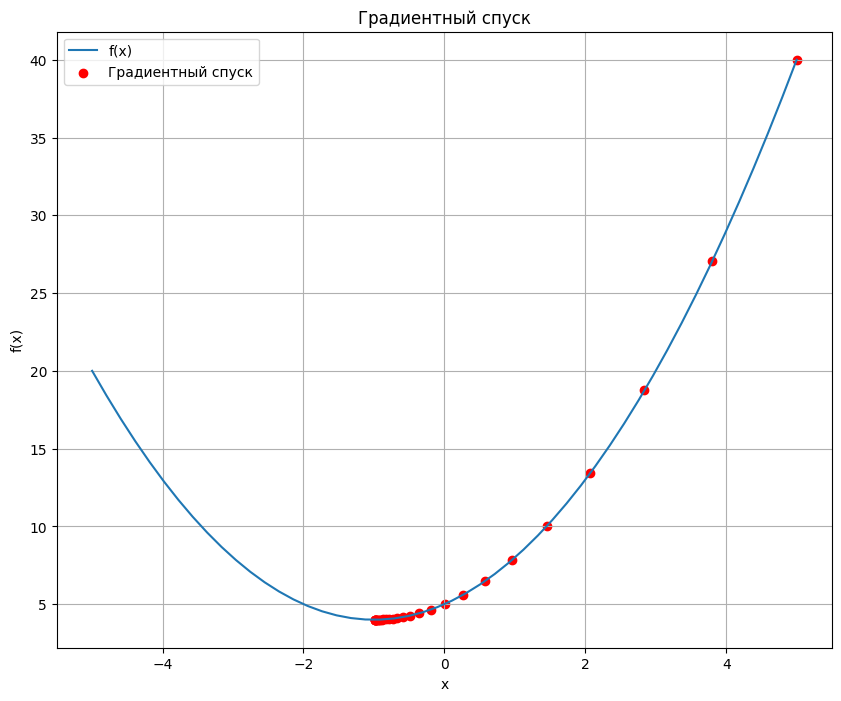

In [21]:
ex = GradientFind(f='x**2+2*x+5', treshold=0.0001, learning_rate = 0.1)
ex.find()
#ex.plot_animation()
ex.plot_simple()

In [ ]:
# Производная функции
def df(x):
  return 2*x